In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
from os.path import join
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

In [3]:
bpth = join(os.path.expanduser('~'), 'works', 'myLeprecon')
specpath = join(bpth, 'SpectrometerData', '20200820')

# Prot waterfall

I arranged all the data vertically.<br>
The red number on the left of the graph show the rotation of the moter. The horizontal axis of the graph is the horizontal pixel value of the each image.<br>
We can see from the graph that the images next to each other overlap about half.

NameError: name 'gritix' is not defined

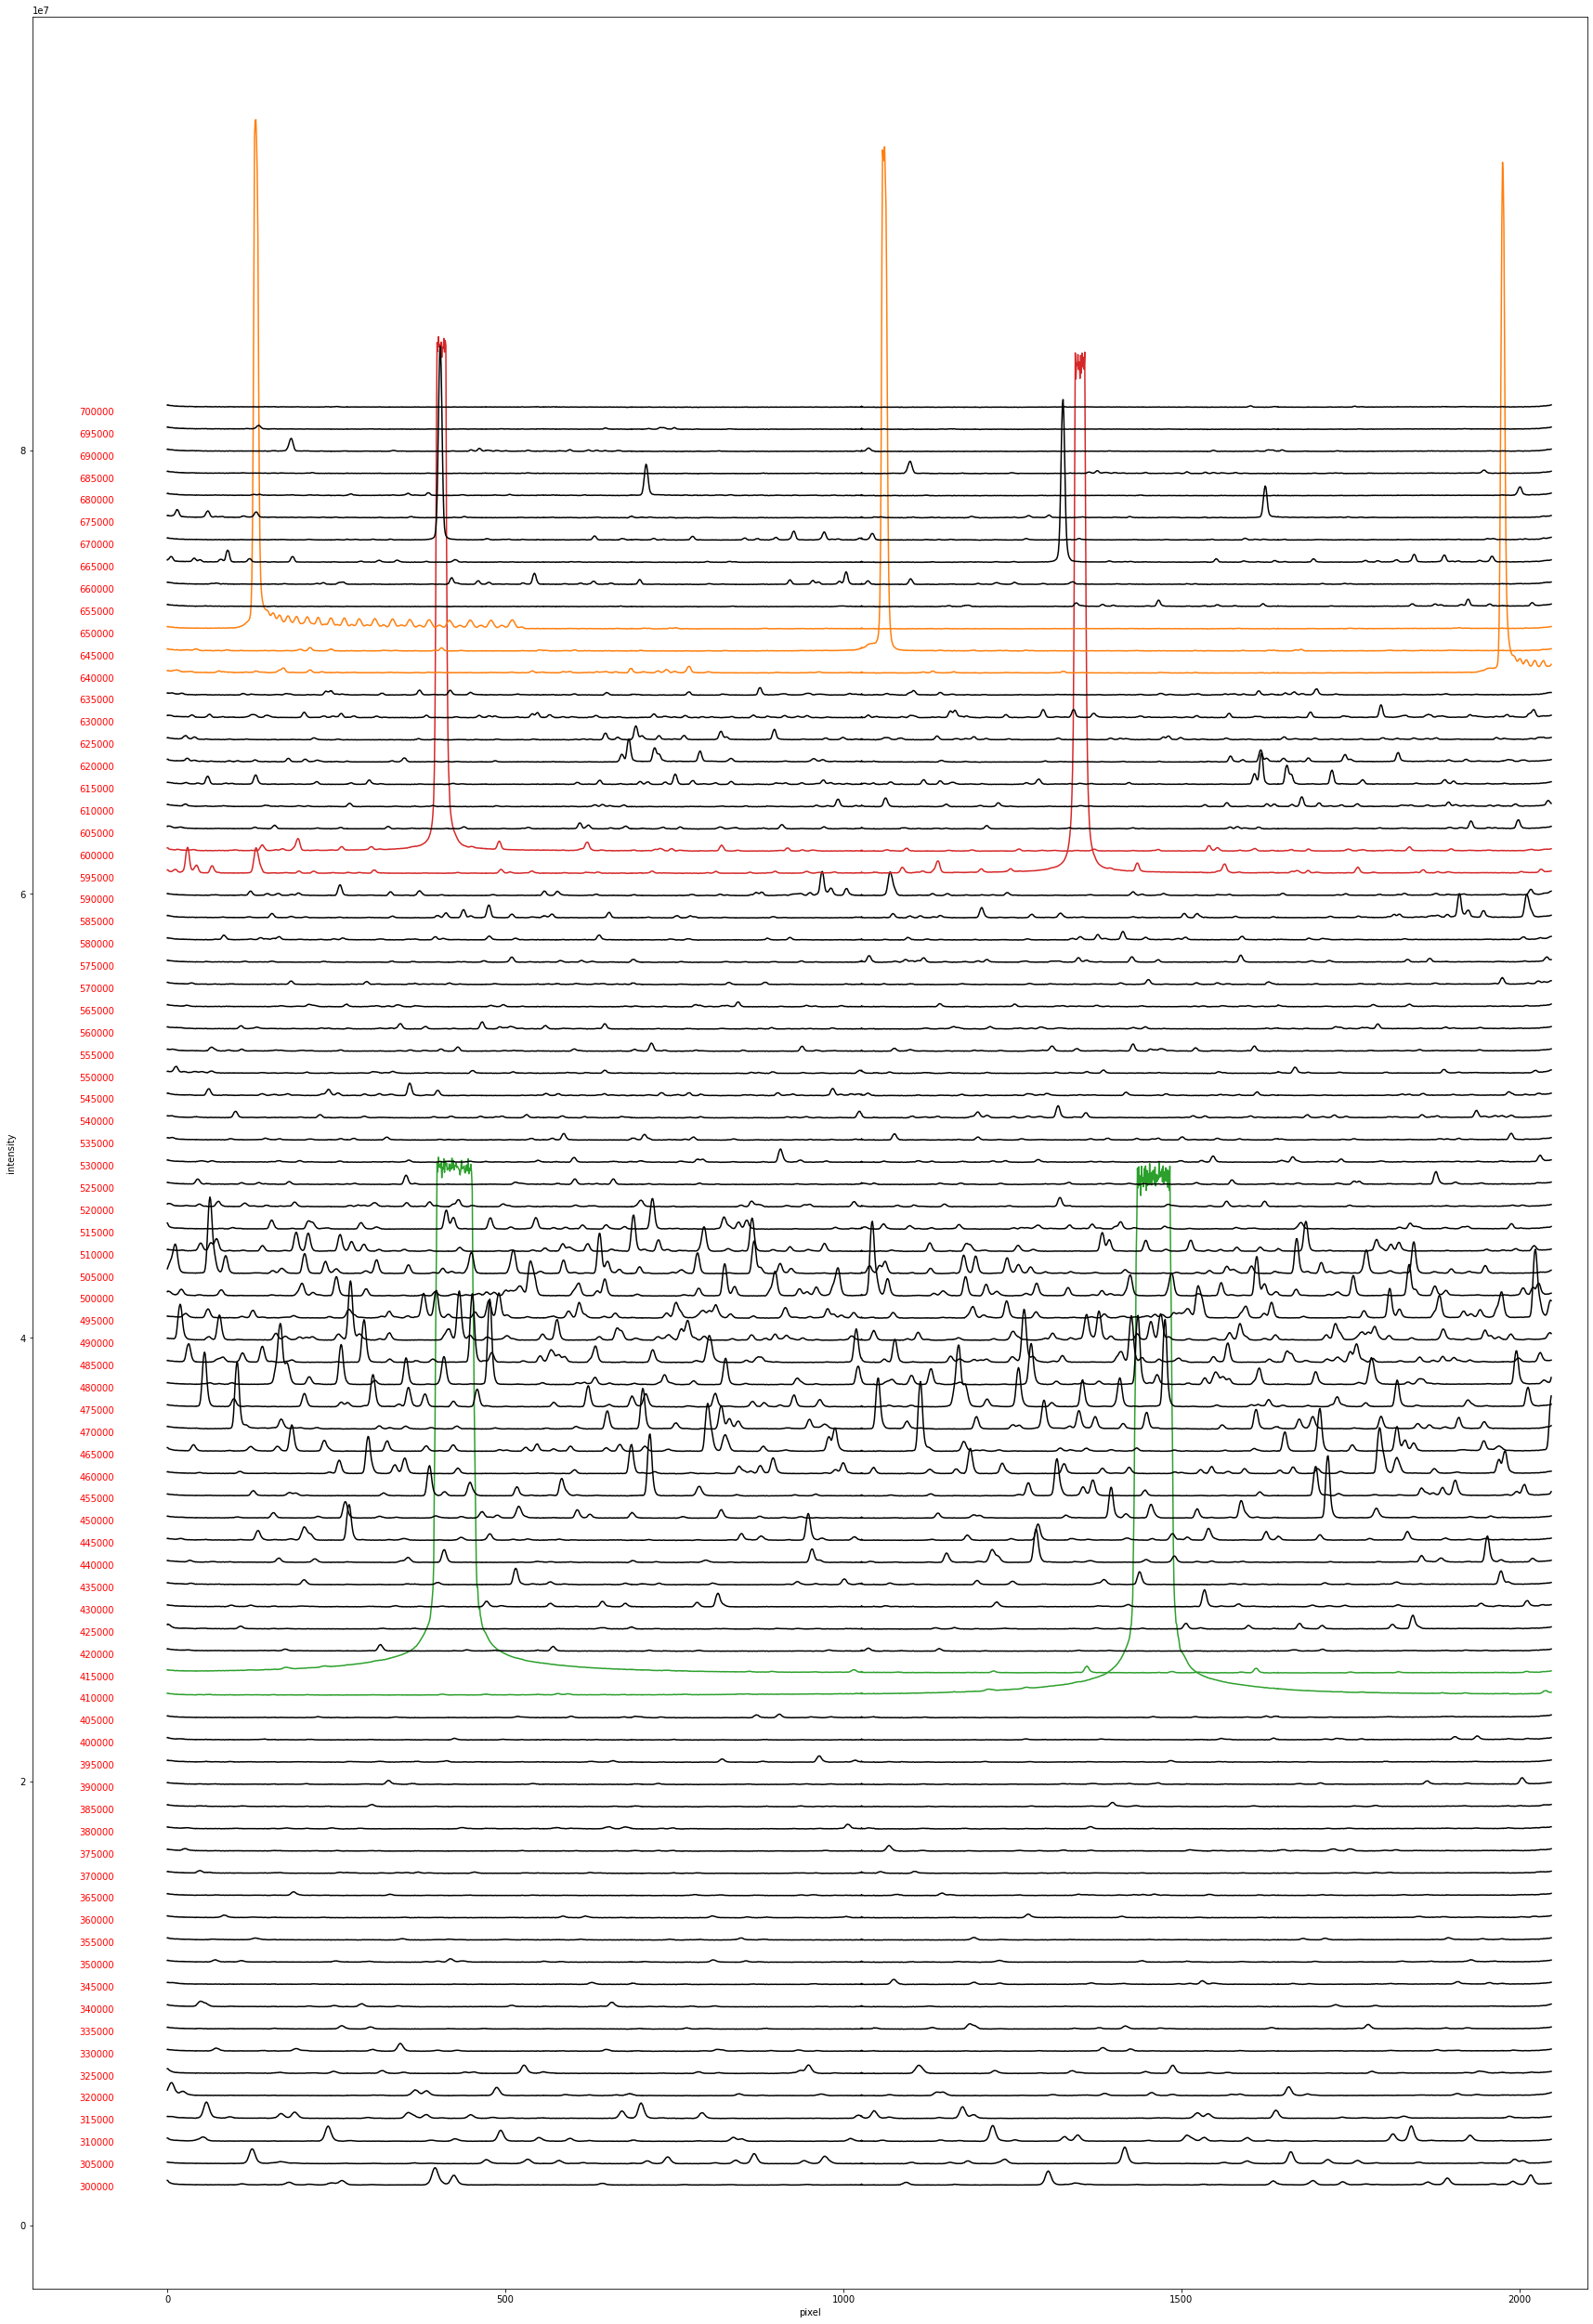

In [4]:
fig = gcf()
fig.set_facecolor('w')
fig.set_size_inches([30, 45])

R = [f'{300000 + 5000 * i}.fit' for i in range(81)]
for i, fp in enumerate(R):
    image_data = fits.getdata(get_pkg_data_filename(join(specpath, fp)), ext=0)

    c = 'k'
    if '410000' in fp or '415000' in fp: c = 'C2'
    if '600000' in fp or '595000' in fp: c = 'C3'
    if '640000' in fp or '645000' in fp or '650000' in fp: c = 'C1'
    
    plot(image_data.sum(axis=0) + i * 1e6, f'{c}')
         
[text(-130, 1.6e6 + 1e6 * i, t[:-4], color='r') for i, t in enumerate(R)]
xlim(-200, 2100)
xlabel('pixel')
ylabel('intensity')
gritix()
plt.close()

# Overlap neighbours
## H-alpha
I saw graph and estimated that the graphs next to each other were offset by 1033.5 pixels.<br>
I plotted a graph and the next graph(add 1033.5 pixels to x axis), and confirmed that the two graph overlap.

(1400.0, 1600.0)

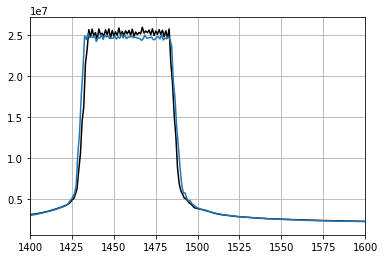

In [5]:
x = np.arange(2048)
fp = '410000.fit'
image_data = fits.getdata(get_pkg_data_filename(join(specpath, fp)), ext=0)
plot(x, image_data.sum(axis=0), 'k')

fp = '415000.fit'
image_data = fits.getdata(get_pkg_data_filename(join(specpath, fp)), ext=0)
plot(x + 1033.5, image_data.sum(axis=0), 'C0')

grid()

xlim(1400, 1600)

## H-beta
The two graph are offset by 945 pixels.

(1320.0, 1380.0)

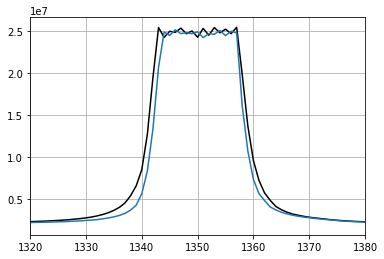

In [6]:
x = np.arange(2048)
fp = '595000.fit'
image_data = fits.getdata(get_pkg_data_filename(join(specpath, fp)), ext=0)
plot(x, image_data.sum(axis=0), 'k')

fp = '600000.fit'
image_data = fits.getdata(get_pkg_data_filename(join(specpath, fp)), ext=0)
plot(x + 945, image_data.sum(axis=0), 'C0')

grid()

xlim(1320, 1380)

## H-gamma
The two graph are offset by 915 pixels.

(1900.0, 2000.0)

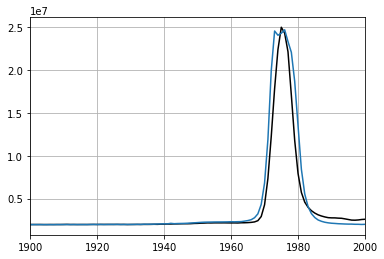

In [7]:
x = np.arange(2048)
fp = '640000.fit'
image_data = fits.getdata(get_pkg_data_filename(join(specpath, fp)), ext=0)
plot(x, image_data.sum(axis=0), 'k')

fp = '645000.fit'
image_data = fits.getdata(get_pkg_data_filename(join(specpath, fp)), ext=0)
plot(x + 915, image_data.sum(axis=0), 'C0')

grid()

xlim(1900, 2000)

## other

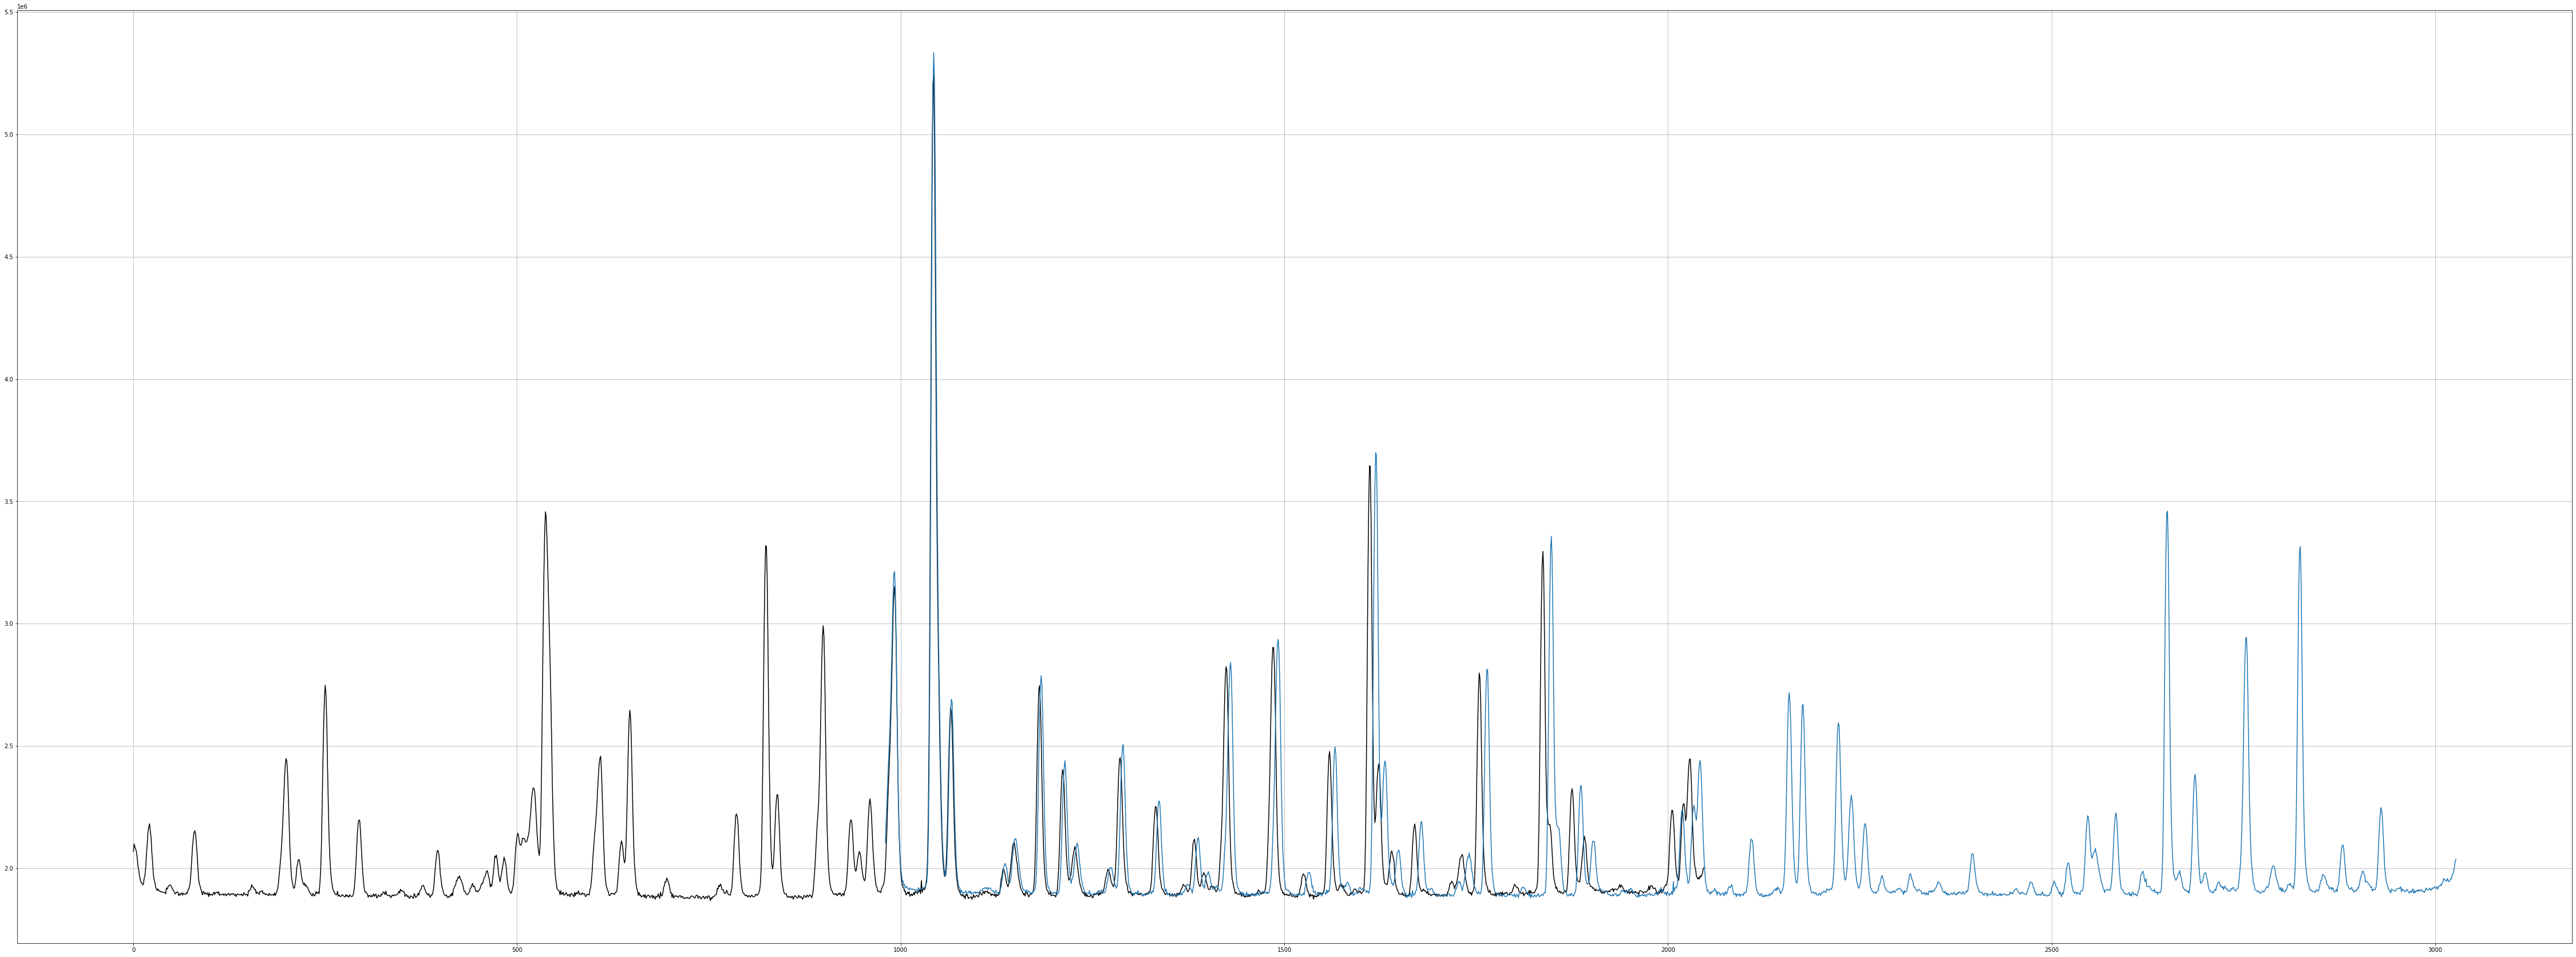

In [8]:
fig = gcf()
fig.set_size_inches([80, 30])

x = np.arange(2048)
fp = '500000.fit'
image_data = fits.getdata(get_pkg_data_filename(join(specpath, fp)), ext=0)
plot(x, image_data.sum(axis=0), 'k')

fp = '505000.fit'
image_data = fits.getdata(get_pkg_data_filename(join(specpath, fp)), ext=0)
plot(x + 980, image_data.sum(axis=0), 'C0')

grid()

# moter-to-sizeOfOverlap
I made a graph of the moter range and the size of the overlap.

[-4.94280040e-04  1.23343267e+03]


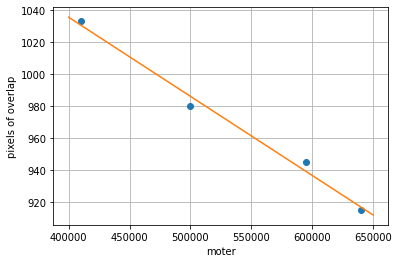

In [9]:
index = np.array([410000,500000, 595000, 640000])
overlap = np.array([1033.5, 980, 945, 915])
plot(index, overlap, 'o')

fun = np.poly1d(np.polyfit(index, overlap, 1))
x = np.linspace(400000, 650000, 100)
plot(x, fun(x))

grid()

xlabel('moter')
ylabel('pixels of overlap')

print(fun.coef)

# Make an overlap spectrum
I estimated the size of overlap by the previous graph.<br>
By the function, I overlaid all the data.

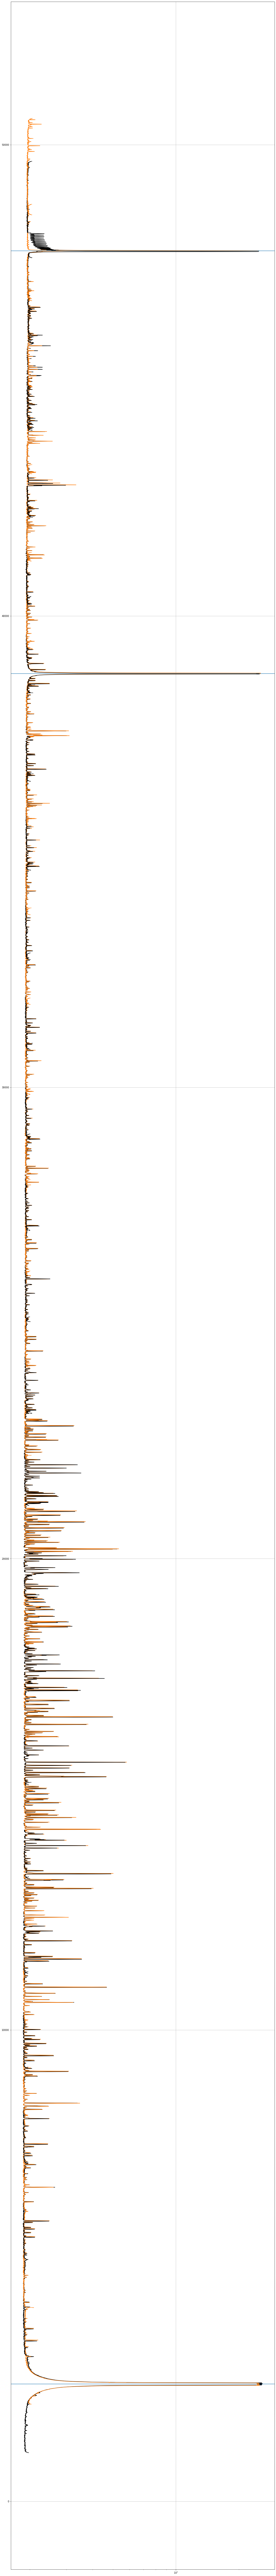

In [30]:
R = [f'{410000 + 5000*i}.fit' for i in range(50)]

fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,200])

x_range = np.arange(2048)
overlap = 0
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    
    overlap = overlap + fun(410000 + 5000 * i)
    x = x_range + overlap
    y = image_data.sum(axis=0)
    plot(y, x, f'{c}')


grid()
xscale('log')
#xlim(1.7e6,6e6)
axhline(2490)
axhline(38780)
axhline(47750)

# Convert pixels to wave length

Text(0, 0.5, 'wavelength, nm')

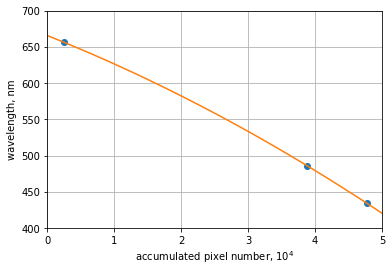

In [31]:
balmers = np.array([656.279, 486.135, 434.047])
rs = np.array([2490, 38780, 47750])
plot(rs/1e4, balmers, 'o')

func = np.poly1d(np.polyfit(rs, balmers, 2))
xp = np.linspace(0, 50000, 100)
plot(xp/1e4, func(xp))
grid()
ylim(400, 700)
xlim(0, 5)
xlabel('accumulated pixel number, $10^{4}$')
ylabel('wavelength, nm')